# Utility functionality for reading and plotting results

### References : TODO

### Imports

In [8]:
import os
import pandas as pd
import sys
from matplotlib import pyplot as plt
import ptitprince as pt
import numpy as np

### Configuration

In [16]:
# ------ Settings ------
# => These variables should be set to the desired settings!

# The files in the directory should have names of the form "{dataset}-factor-{downsample factor}-{any remaining information}"
directory = 'C:/Users/Owner/Documents/University/Y3/Q4/Research Project/Results/Collective results 01.06/Collected'

# The dataset for the titles of the plots
dataset = 'OSCD and LEVIR'

# The algorithms to consider, needs to match Excel header
algorithms = [
    'Change Vector Analysis',
    #'Differential Principal Component Analysis',
    #'Image Differencing',
    #'Image Ratioing',
    #'Image Regression',
    'Iterative Reweighted MAD',
    #'Multivariate Alteration Detection',
    #'Change Detection PCA k-Means',
    #'Principal Component Differential Analysis'
]

# ---- The metrics to consider ----

# Given in the Excel file
metrics_precalc = [
    #'OA',
    #'UA',
    #'Recall',
    #'FMeasure',
    #'AUC',
    #'Kappa'
]

# Need to be calculated here -> assumes that the Excel file contains TP, FP, TN and FN
metrics_calc = [
    'OA',
    #'UA',
    'Recall',
    'Precision',
    'FMeasure',
    'Kappa'
]

# Do not modify
metrics = metrics_precalc + metrics_calc

# ---- Plotting ----
plot_hist = False # Whether to save histogram plots
plot_mean = False # Whether to save plots of mean values
plot_scatter = False # Whether to save plots with scattered values
plot_raincloud = True # Whether to save raincloud plots
plot_ecum = False # Whether to plot an empirical cumulative distribution

### Load the initial data

In [25]:
thresholding = 'K-Means'

data_per_alg = {}
factors = []

for alg in algorithms:
    data_per_alg[alg] = {}

# Read in all the data
for fname in os.listdir(directory):
    fpath = os.path.join(directory, fname)
    ftype = os.path.splitext(fname)[-1].lower()

    # Check if it is an Excel file
    if os.path.isfile(fpath) and ftype == '.xls':
        df = pd.read_excel(fpath, header=[0])

        factor = fname.split('-')[2]

        # Insert it sorted based on factor
        idx = 0
        while idx < len(factors) and float(factors[idx]) < float(factor):
            idx += 1
        factors.insert(idx, factor)

        for alg in algorithms:
            tmp = df.loc[df['name'] == alg]
            data_per_alg[alg][factor] = tmp.loc[tmp['threAlg'] == thresholding]

factors_ints = [float(factor) for factor in factors]

### Calculate metrics

In [26]:
metric_lambdas = {
    'OA' : lambda x: (x.TP + x.TN) / (x.TP + x.TN + x.FP + x.FN),
    'Kappa' : lambda x: (2 * (x.TP * x.TN - x.FN * x.FP)) / ((x.TP + x.FP) * (x.FP + x.TN) + (x.TP + x.FN) * (x.FN + x.TN)),
    'FMeasure' : lambda x: x.TP / (x.TP + 1/2 * (x.FP + x.FN)),
    'Precision' : lambda x: x.TP / (x.TP + x.FP),
    'Recall' : lambda x: x.TP / (x.TP + x.FN)
}

for alg in algorithms:
    for factor in factors:
        kwargs = {}

        for metric in metrics_calc:
            kwargs[metric] = metric_lambdas[metric]
        
        data_per_alg[alg][factor] = data_per_alg[alg][factor].assign(**kwargs)

### Create plots

In [27]:
# Create all needed directories
plt_dir = os.path.join(directory, 'Plots')
if not os.path.exists(plt_dir):
    os.makedirs(plt_dir)

hist_dir = os.path.join(plt_dir, 'Histograms')
if plot_hist and not os.path.exists(hist_dir):
    os.makedirs(hist_dir)

ecum_dir = os.path.join(plt_dir, 'Cumulative distributions')
if plot_ecum and not os.path.exists(ecum_dir):
    os.makedirs(ecum_dir)

means_dir = os.path.join(plt_dir, 'Means')
if plot_mean and not os.path.exists(means_dir):
    os.makedirs(means_dir)

scatter_dir = os.path.join(plt_dir, 'Scatter')
if plot_scatter and not os.path.exists(scatter_dir):
    os.makedirs(scatter_dir)

raincloud_dir = os.path.join(plt_dir, 'Raincloud')
if plot_raincloud and not os.path.exists(raincloud_dir):
    os.makedirs(raincloud_dir)

for metric in metrics:
    if plot_mean and not os.path.exists(os.path.join(means_dir, metric)):
        os.makedirs(os.path.join(means_dir, metric))

    if plot_scatter and not os.path.exists(os.path.join(scatter_dir, metric)):
        os.makedirs(os.path.join(scatter_dir, metric))

    if plot_raincloud and not os.path.exists(os.path.join(raincloud_dir, metric)):
        os.makedirs(os.path.join(raincloud_dir, metric))

<Figure size 640x480 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

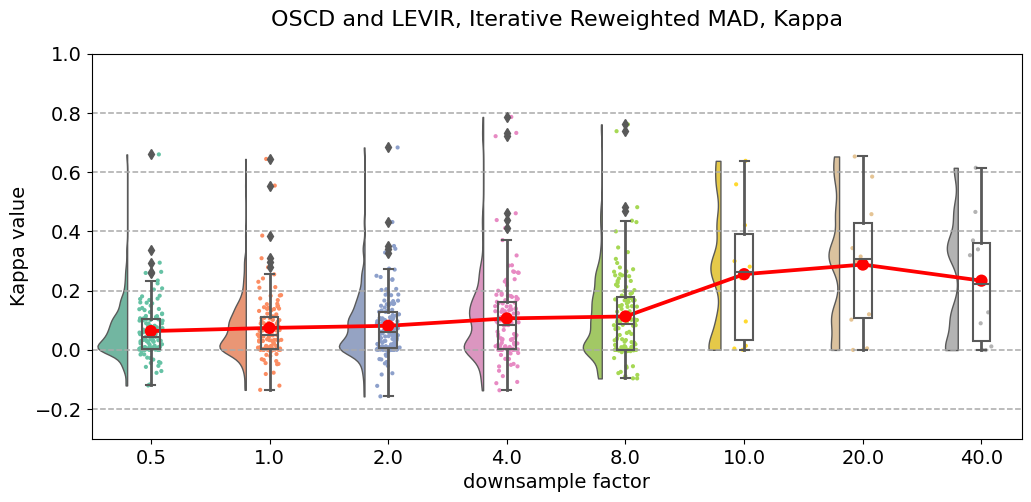

In [29]:
# Styling configuration
plt.rcParams.update({'axes.titlesize': 16, 'xtick.labelsize': 14, 'ytick.labelsize': 14, 'axes.labelsize': 14, 'legend.fontsize' : 14})
plt.grid(True, linestyle='--')

# Collect data for the plots, save the plots
for alg in algorithms:
    for metric in metrics:
        x_axs_plot_mean = factors_ints
        y_axs_plot_mean = []

        x_axs_scatter = []
        y_axs_scatter = []

        ecum_vals = []

        raincloud_data = {'downsample factor': [], metric + ' value': []} 
        
        for factor in factors:
            m_res = data_per_alg[alg][factor].loc[:, [metric]][metric]
            f_res = [float(factor) for _ in m_res]

            y_axs_plot_mean.append(m_res.mean())

            x_axs_scatter.extend(f_res)
            y_axs_scatter.extend(m_res)

            ecum_vals.append(m_res)

            raincloud_data['downsample factor'].extend(f_res)
            raincloud_data[metric + ' value'].extend(m_res)

            # Plot histogram
            if plot_hist:
                plt.clf()
                plt.title(dataset + ', ' + alg + ', ' + metric + ', factor = ' + factor, pad=20)
                plt.ylim([0, 1])

                bins = []
                center = []
                if not metric == 'Kappa':
                    plt.xlim([0, 1])
                    bins = [-0.05,0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95]
                    center = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
                else:
                    plt.xlim([-0.35, 1])
                    bins = [-0.35,-0.25,-0.15,-0.05,0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95]
                    center = [-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
                
                counts, bins = np.histogram(m_res, bins)
                counts = counts / float(sum(counts))
                plt.bar(center, counts, width = 0.1)
            
                plt.savefig(os.path.join(hist_dir, alg + '-' + metric + '-' + factor + '.png'))

        # Plot means
        if plot_mean:
            plt.clf()
            plt.title(dataset + ', ' + alg + ', ' + metric)
            plt.plot(x_axs_plot_mean, y_axs_plot_mean, 'go-')
            plt.xticks(factors_ints, factors)
            plt.savefig(os.path.join(means_dir, metric, alg + '-' + metric + '.png'))

        # Plot scatter
        if plot_scatter:
            plt.clf()
            plt.title(dataset + ', ' + alg + ', ' + metric)
            plt.scatter(x_axs_scatter, y_axs_scatter, s=10, color='g')
            plt.xticks(factors_ints, factors)
            plt.savefig(os.path.join(scatter_dir, metric, alg + '-' + metric + '.png'))

        # Plot empirical cumulative distribution
        if plot_ecum:
            plt.clf()
            plt.title(dataset + ', ' + alg + ', ' + metric, pad=20)

            for idx, m_res in enumerate(ecum_vals):
                no_nans = [x for x in m_res if not np.isnan(x)]
                print(f'For {metric} {alg} there are {len(m_res) - len(no_nans)} nans!')

                plt.ecdf(no_nans, label='factor = ' + factors[idx])

            if not metric == 'Kappa':
                plt.xlim([0, 1])
            else:
                plt.xlim([-0.3, 1])

            plt.legend()
            plt.savefig(os.path.join(ecum_dir, alg + '-' + metric + '.png'))

        # Plot raincloud
        # Source: ptitprince tutorial from https://github.com/pog87/PtitPrince
        if plot_raincloud:
            plt.clf()
            f, ax = plt.subplots(figsize=(12, 5))
            plt.title(dataset + ', ' + alg + ', ' + metric, pad=20)
            if not metric == 'Kappa':
                ax.set_ylim([0, 1])
            else:
                ax.set_ylim([-0.3, 1])
            ax.yaxis.grid(color='darkgrey', linestyle='--', linewidth=1.1)
            ax = pt.RainCloud(
                x = 'downsample factor',
                y = metric + ' value',
                data = pd.DataFrame(raincloud_data),
                palette = 'Set2',
                bw = 0.2,
                width_viol = 0.5,
                ax = ax,
                orient = 'v',
                pointplot = True)
            plt.savefig(os.path.join(raincloud_dir, metric, alg + '-' + metric + '.png'), bbox_inches='tight')